In [ ]:
###### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
import tensorflow as tf
from tensorflow.keras import datasets ,layers,models
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

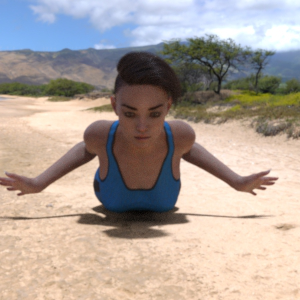

In [123]:
img = image.load_img("../input/yogapose/train/cobra/girl1_cobra026.jpg")
img

In [17]:
import cv2
img_num = cv2.imread("../input/yogapose/test/chair/guy3_chair070.jpg")
img_num.shape


(300, 300, 3)

In [5]:
### train = ImageDataGenerator(rescale = 1/255)
train = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images



valid = ImageDataGenerator(rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images 

In [6]:
train_dataset = train.flow_from_directory(
        '../input/yogapose/train',
        target_size=(300, 300),  
        class_mode='binary')
validation_dataset = valid.flow_from_directory(
        '../input/yogapose/test',
        target_size=(300, 300),
        class_mode='binary')

Found 1000 images belonging to 5 classes.
Found 495 images belonging to 5 classes.


In [7]:
train_dataset.class_indices


{'chair': 0, 'cobra': 1, 'dog': 2, 'tree': 3, 'warrior': 4}

In [8]:
# Create the base model of VGG19
vgg19 = VGG19( include_top=False, input_shape = (300, 300, 3) , weights = 'imagenet')

In [9]:
vgg19.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0     

In [10]:
model = Sequential()

for layer in vgg19.layers[:-1]: # this is where I changed your code
    model.add(layer)    
# Freeze the layers 
#for layer in model.layers:
#    layer.trainable = False

In [11]:
model.add(Flatten())
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 75, 75, 256)       2

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer = opt, loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
history = model.fit(train_dataset, validation_data=validation_dataset, epochs = 5 , batch_size = 64)
history

Epoch 1/5
32/32 [==============================] - 51s 1s/step - loss: -15.3957 - accuracy: 0.1907 - val_loss: -572.9857 - val_accuracy: 0.2343
Epoch 2/5
32/32 [==============================] - 38s 1s/step - loss: -19693.3233 - accuracy: 0.2274 - val_loss: -711197.3750 - val_accuracy: 0.2343
Epoch 3/5
32/32 [==============================] - 38s 1s/step - loss: -10641199.6610 - accuracy: 0.2077 - val_loss: -289473184.0000 - val_accuracy: 0.2343
Epoch 4/5
32/32 [==============================] - 38s 1s/step - loss: -2981307758.0606 - accuracy: 0.1969 - val_loss: -64160899072.0000 - val_accuracy: 0.2343
Epoch 5/5
32/32 [==============================] - 38s 1s/step - loss: -443133718652.1212 - accuracy: 0.2013 - val_loss: -7356590063616.0000 - val_accuracy: 0.2343


In [107]:


import csv
import cv2
import itertools
import numpy as np
import pandas as pd
import os
import sys
import tempfile
import tqdm

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [108]:
# Download model from TF Hub and check out inference code from GitHub
!wget -q -O movenet_thunder.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
!git clone https://github.com/tensorflow/examples.git
pose_sample_rpi_path = os.path.join(os.getcwd(), 'examples/lite/examples/pose_estimation/raspberry_pi')
sys.path.append(pose_sample_rpi_path)

# Load MoveNet Thunder model
import utils
from movenet import Movenet
movenet = Movenet('movenet_thunder')

fatal: destination path 'examples' already exists and is not an empty directory.


In [109]:
img_num.shape

(300, 300, 3)

In [110]:
movenet.detect(img_num)[:,0:2]

array([[0.30998915, 0.49789256],
       [0.29942968, 0.5143785 ],
       [0.30091533, 0.48752794],
       [0.3089551 , 0.5356868 ],
       [0.31018722, 0.46978626],
       [0.37473   , 0.5625988 ],
       [0.37203997, 0.446239  ],
       [0.26321554, 0.61470956],
       [0.26506367, 0.39226496],
       [0.18250155, 0.6005355 ],
       [0.14895087, 0.39996004],
       [0.6267434 , 0.54304135],
       [0.62961704, 0.4612783 ],
       [0.8042111 , 0.5197429 ],
       [0.80517906, 0.46207568],
       [0.9478823 , 0.5167543 ],
       [0.9426034 , 0.47735846]], dtype=float32)


# detect pose landmarks and them into npy file

In [111]:
def MoveNetPreprocessor(pose_folder_path) : 
    train_pose_landmarks = np.array([]).reshape(0,17,2)
    label_train_pose_landmarks = np.array([]).reshape(0,)
    i = 0
    folders = os.listdir(pose_folder_path)
    for path_1 in folders : 
        image = os.listdir(pose_folder_path + '/'+ path_1)
        for img in image : 
            num_img = cv2.imread(pose_folder_path + '/'+ path_1 + '/' + img)
            pose_landmarks = movenet.detect(num_img)[:,0:2].reshape(1,17,2) 
            train_pose_landmarks = np.vstack([train_pose_landmarks,pose_landmarks])
            label_train_pose_landmarks = np.append(label_train_pose_landmarks , i)
        i += 1
    np.save('./train_pose_landmarks.npy' ,train_pose_landmarks)
    np.save('./label_train_pose_landmarks.npy' ,label_train_pose_landmarks)
    return train_pose_landmarks, label_train_pose_landmarks
            

In [112]:
X_train, y_train = MoveNetPreprocessor('../input/yogapose/train')

In [113]:
X_test, y_test = MoveNetPreprocessor('../input/yogapose/test')

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train , test_size=0.15, random_state=42)

In [117]:
model = models.Sequential([
          layers.Flatten(),
          layers.Dense(128,activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(64,activation='relu'),
          layers.Dropout(0.2),
          layers.Dense(5,activation='softmax'),

])
model.build((0,17,2))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (0, 34)                   0         
_________________________________________________________________
dense_18 (Dense)             (0, 128)                  4480      
_________________________________________________________________
dropout_10 (Dropout)         (0, 128)                  0         
_________________________________________________________________
dense_19 (Dense)             (0, 64)                   8256      
_________________________________________________________________
dropout_11 (Dropout)         (0, 64)                   0         
_________________________________________________________________
dense_20 (Dense)             (0, 5)                    325       
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
__________________________________________________

In [116]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history = model.fit(x = X_train,y = y_train , batch_size = 32 , epochs = 50  , shuffle=True)
history

Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 1.5978 - accuracy: 0.2513
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 1.4509 - accuracy: 0.3907
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 1.3091 - accuracy: 0.5315
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 1.1461 - accuracy: 0.5835
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 1.0628 - accuracy: 0.6289
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.9598 - accuracy: 0.6891
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8672 - accuracy: 0.7029
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.8045 - accuracy: 0.7318
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7546 - accuracy: 0.7313
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.7621
Epoch 11/50
27/27 [

In [118]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

# Start training
history = model.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
54/54 [==============================] - 1s 5ms/step - loss: 1.5529 - accuracy: 0.3116 - val_loss: 1.3576 - val_accuracy: 0.6067

Epoch 00001: val_accuracy improved from -inf to 0.60667, saving model to weights.best.hdf5
Epoch 2/200
54/54 [==============================] - 0s 3ms/step - loss: 1.3506 - accuracy: 0.4520 - val_loss: 1.1857 - val_accuracy: 0.4733

Epoch 00002: val_accuracy did not improve from 0.60667
Epoch 3/200
54/54 [==============================] - 0s 3ms/step - loss: 1.1477 - accuracy: 0.5599 - val_loss: 1.0167 - val_accuracy: 0.6533

Epoch 00003: val_accuracy improved from 0.60667 to 0.65333, saving model to weights.best.hdf5
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.9968 - accuracy: 0.6260 - val_loss: 0.8968 - val_accuracy: 0.6933

Epoch 00004: val_accuracy improved from 0.65333 to 0.69333, saving model to weights.best.hdf5
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.8929 - accuracy: 0.6583

In [119]:
# Evaluate the model using the TEST dataset
loss, accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 1ms/step - loss: 0.1458 - accuracy: 0.9374


In [120]:
model.save('./yoga_pose_model.h5')

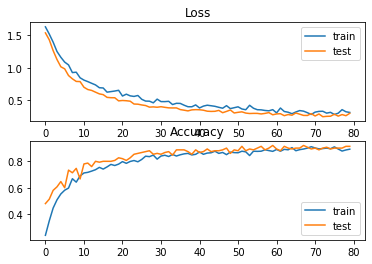

In [32]:
from matplotlib import pyplot

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [8]:
def draw_keypoints(frame, keypoints, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1])) 
    for kp in shaped:
        ky, kx, kp_conf = kp
        if kp_conf > confidence_threshold:
            cv2.circle(frame, (int(kx), int(ky)), 4, (0,255,0), -1)
            cv.imshow

In [9]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

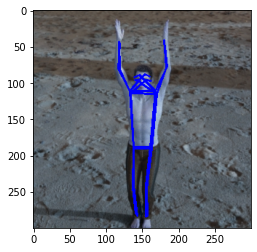

In [38]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [26]:
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

In [31]:
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)

In [124]:
draw_connections(img_num,movenet.detect(img_num), EDGES, 0.0)

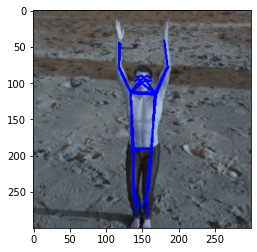

In [125]:
import matplotlib.pyplot as plt
plt.imshow(img_num)